## Import

In [50]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('../Data/movie_data.csv')
df.head(5)

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action/Adventure,Animation,Biography/History/War,...,Drama,Fantasy/Sci-Fi,Horror/Thriller/Mystery,Kids/Family,Music/Musical,Other,Romance,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12398.815824,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,True,False,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,True,False,True,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,False,False,False,False,False,False,True,0.0,0.0,1


In [52]:
df.columns

Index(['Title', 'Release time', 'Age rating', 'Runtime', 'Language',
       'IMDb Rating', 'IMDb Votes', 'Action/Adventure', 'Animation',
       'Biography/History/War', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy/Sci-Fi', 'Horror/Thriller/Mystery', 'Kids/Family',
       'Music/Musical', 'Other', 'Romance', 'Win', 'Nomination',
       'Age rating quantification'],
      dtype='object')

## Câu hỏi: Thể loại nào có xu hướng phát triển mạnh nhất qua các năm dựa trên số lượng phim phát hành?

**Cách thực hiện**:

- **Cột cần thiết**: `Release time` và 13 cột thể loại

- **Tính toán**: Tính tổng số lượng phim phát hành mỗi quý theo năm theo từng thể loại

- **Trực quan hóa**: Trực quan hóa xu hướng của mỗi thể loại qua các quý theo năm để so sánh sự thay đổi về số lượng phim phát hành của từng thể loại.

### 5.1. Tiền xử lý

In [53]:
data = df[["Release time", "Action/Adventure", "Animation", "Biography/History/War", "Comedy", "Crime", "Documentary",
          "Drama", "Fantasy/Sci-Fi", "Horror/Thriller/Mystery", "Kids/Family", "Music/Musical", "Romance", "Other"]]
data["Year"] = data["Release time"].str[0:4].astype(int)
data["Month"] = data["Release time"].str[5:7].astype(int)
def quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 4 <= month <= 6:
        return 2
    elif 7 <= month <= 9:
        return 3
    else:
        return 4
data["Quarter"] = data["Month"].apply(quarter)

data = data.drop(columns=["Release time", "Month"])

/tmp/ipykernel_14759/3007731151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year"] = data["Release time"].str[0:4].astype(int)
/tmp/ipykernel_14759/3007731151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Release time"].str[5:7].astype(int)
/tmp/ipykernel_14759/3007731151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [54]:
grouped_data = data.groupby(["Quarter","Year"]).sum()
grouped_data

Action/Adventure  Animation  Biography/History/War  Comedy  \
Quarter Year                                                               
1       2023                35          6                      8      50   
        2024                60         15                     17      71   
2       2023                41          7                     10      47   
        2024                51         23                     16      70   
3       2023                33         10                     15      54   
        2024                53         12                     12      51   
4       2023                42         18                     21      73   
        2024                44         16                     20      40   

              Crime  Documentary  Drama  Fantasy/Sci-Fi  \
Quarter Year                                              
1       2023     21           29     44               9   
        2024     26           50     68              18   
2       2023      9           34     71              11   
        2024     37           43     81              10   
3       2023     18           37     62              11   
        2024     30           26     72              17   
4       2023     17           37     88              26   
        2024     16           20     64              13   

              Horror/Thriller/Mystery  Kids/Family  Music/Musical  Romance  \
Quarter Year                                                                 
1       2023                       43            7              6       22   
        2024                       66            7              7       21   
2       2023                       42           13              9       32   
        2024                       73            9             10       19   
3       2023                       49           10              1       26   
        2024                       78           10              1       17   
4       2023                       55           17             10       62   
        2024                       62            5             11       16   

              Other  
Quarter Year         
1       2023     11  
        2024     17  
2       2023      7  
        2024     17  
3       2023     17  
        2024      9  
4       2023     14  
        2024      5

### 5.2. Trực quan hóa dữ liệu

In [55]:
grouped_data = grouped_data.reset_index()
grouped_data["Time"] = grouped_data["Year"].astype(str) + "-Q" + grouped_data["Quarter"].astype(str)
grouped_data = grouped_data.sort_values(by=["Year", "Quarter"])
grouped_data

,Quarter,Year,Action/Adventure,Animation,Biography/History/War,Comedy,Crime,Documentary,Drama,Fantasy/Sci-Fi,Horror/Thriller/Mystery,Kids/Family,Music/Musical,Romance,Other,Time
0,1,2023,35,6,8,50,21,29,44,9,43,7,6,22,11,2023-Q1
2,2,2023,41,7,10,47,9,34,71,11,42,13,9,32,7,2023-Q2
4,3,2023,33,10,15,54,18,37,62,11,49,10,1,26,17,2023-Q3
6,4,2023,42,18,21,73,17,37,88,26,55,17,10,62,14,2023-Q4
1,1,2024,60,15,17,71,26,50,68,18,66,7,7,21,17,2024-Q1
3,2,2024,51,23,16,70,37,43,81,10,73,9,10,19,17,2024-Q2
5,3,2024,53,12,12,51,30,26,72,17,78,10,1,17,9,2024-Q3
7,4,2024,44,16,20,40,16,20,64,13,62,5,11,16,5,2024-Q4


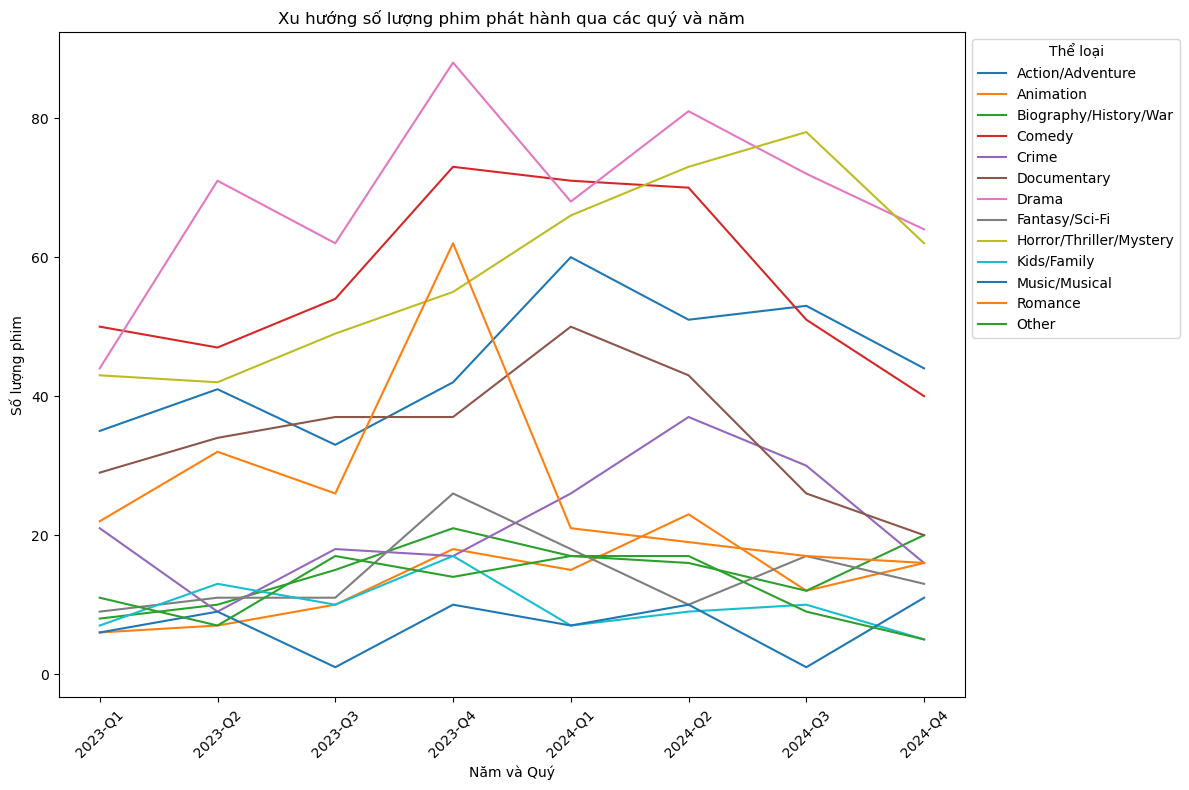

In [ ]:
plt.figure(figsize=(12, 8))

for column in grouped_data.columns[2:-1]: 
    plt.plot(grouped_data["Time"], grouped_data[column], label=column)

plt.title("Xu hướng số lượng phim phát hành qua các quý và năm")
plt.xlabel("Năm và Quý")
plt.ylabel("Số lượng phim")
plt.xticks(rotation=45)  
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Thể loại")  
plt.tight_layout()

plt.show()

**Nhận xét:**
- Tăng trưởng nhanh:
    - Action/Adventure: Đây là thể loại có sự tăng trưởng mạnh mẽ, đặc biệt trong năm 2024. Điều này có thể phản ánh sự gia tăng nhu cầu đối với các bộ phim hành động và phiêu lưu.
    - Fantasy/Sci-Fi: Thể loại khoa học viễn tưởng và kỳ ảo tăng trưởng rất nhanh, đặc biệt vào quý 2 và quý 4 năm 2024.
    - Comedy: Xu hướng tăng mạnh trong năm 2024, đặc biệt là vào quý 1.
- Suy giảm:
    - Documentary: Thể loại phim tài liệu có sự suy giảm nhẹ, đặc biệt là vào cuối năm 2023 và đầu năm 2024.
    - Music/Musical: Mặc dù không có sự suy giảm mạnh, nhưng thể loại này có xu hướng giảm nhẹ trong những quý gần đây.
    - Other: Thể loại khác không có sự phát triển rõ rệt và có xu hướng giảm trong năm 2024.


### 5.3. Kết luận

**Thể loại phim chất lượng cao:**
- Action/Adventure và Fantasy/Sci-Fi phát triển mạnh mẽ, với sự chú trọng vào cốt truyện và hiệu ứng đặc biệt, đặc biệt là vào quý 1 và quý 2 năm 2024.
- Comedy phát triển mạnh đầu năm 2024, với sự giải trí dễ tiếp cận.

**Thể loại phim thương mại phổ thông:**
- Romance, Drama, Biography/History/War có mức phát hành ổn định, lý tưởng

**Các thể loại phim khác:**
- Documentary và Music/Musical suy giảm nhẹ, phản ánh sự thay đổi sở thích khán giả.
- Horror/Thriller/Mystery và Crime phát hành ổn định, với nhu cầu giải trí nhẹ nhàng.